In [2]:
install.packages("car")

Installing package into 'C:/Users/jacki/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

also installing the dependencies 'Matrix', 'numDeriv', 'SparseM', 'MatrixModels', 'minqa', 'nloptr', 'RcppEigen', 'carData', 'abind', 'pbkrtest', 'quantreg', 'lme4'





  There are binary versions available but the source versions are later:
      binary source needs_compilation
minqa  1.2.4  1.2.5              TRUE
car    3.1-0  3.1-1             FALSE

  Binaries will be installed
package 'Matrix' successfully unpacked and MD5 sums checked
package 'numDeriv' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'MatrixModels' successfully unpacked and MD5 sums checked
package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'carData' successfully unpacked and MD5 sums checked
package 'abind' successfully unpacked and MD5 sums checked
package 'pbkrtest' successfully unpacked and MD5 sums checked
package 'quantreg' successfully unpacked and MD5 sums checked
package 'lme4' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\

installing the source package 'car'




In [3]:
library("car")

Loading required package: carData



In [5]:
library("caret")

Loading required package: ggplot2

Loading required package: lattice



ERROR: Error: package or namespace load failed for 'caret' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace 'rlang' 1.0.3 is already loaded, but >= 1.0.4 is required


In [7]:
install.packages("gvlma")

Installing package into 'C:/Users/jacki/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'gvlma' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jacki\AppData\Local\Temp\RtmpIXVpbb\downloaded_packages


In [8]:
library("gvlma")

In [9]:
install.packages("predictmeans")

Installing package into 'C:/Users/jacki/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

also installing the dependency 'lmeInfo'





  There is a binary version available but the source version is later:
        binary source needs_compilation
lmeInfo  0.2.1  0.3.0             FALSE

package 'predictmeans' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jacki\AppData\Local\Temp\RtmpIXVpbb\downloaded_packages


installing the source package 'lmeInfo'




In [10]:
library("predictmeans")

Loading required package: lme4

Loading required package: Matrix

Loading required package: nlme


Attaching package: 'nlme'


The following object is masked from 'package:lme4':

    lmList


Loading required package: lmeInfo

Loading required package: parallel



ERROR: Error: package or namespace load failed for 'predictmeans' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace 'rlang' 1.0.3 is already loaded, but >= 1.0.4 is required


In [12]:
install.packages("readxl")

Installing package into 'C:/Users/jacki/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jacki\AppData\Local\Temp\RtmpIXVpbb\downloaded_packages


In [13]:
library("readxl")

In [18]:
heights = read_excel('C:/Users/jacki/OneDrive/Desktop/Entity/DSO106C Machine Learning and Modeling/heightss.xlsx')

# Complete simple linear regression in R. Make sure to test, note, and correct for all assumptions if possible!

## Test Assumptions

### 1)Linearity

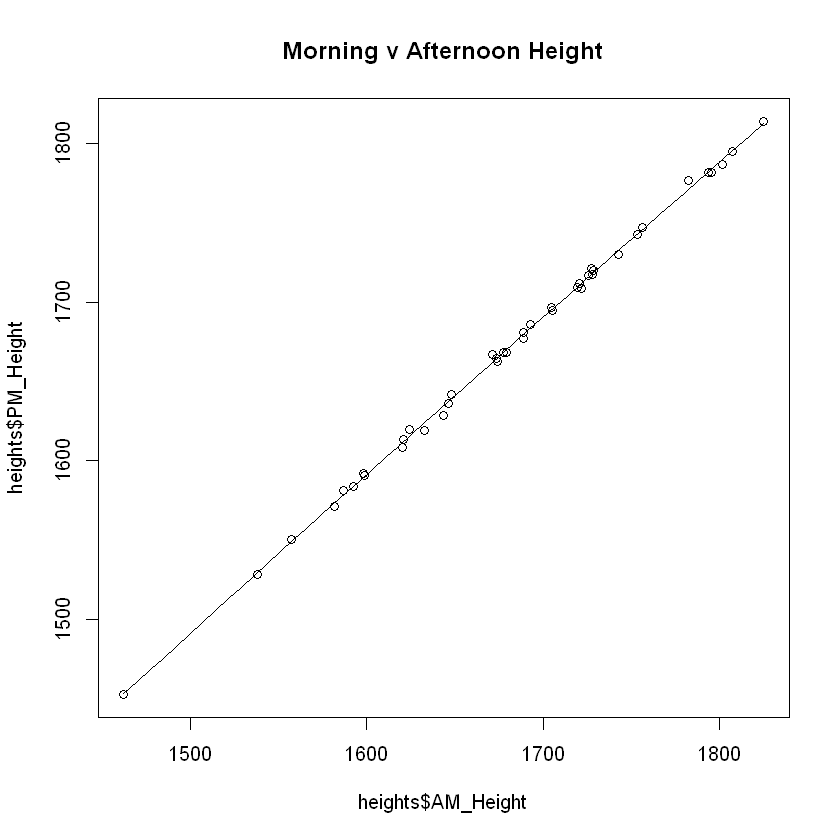

In [19]:
scatter.smooth(x=heights$AM_Height, y=heights$PM_Height, main="Morning v Afternoon Height")

#### The data follows a straight line so linearity is assumed

### 2) Homoscedasticity

In [20]:
lmModHeights = lm(PM_Height~AM_Height, data=heights)

In [21]:
par(mfrow=c(2,2))

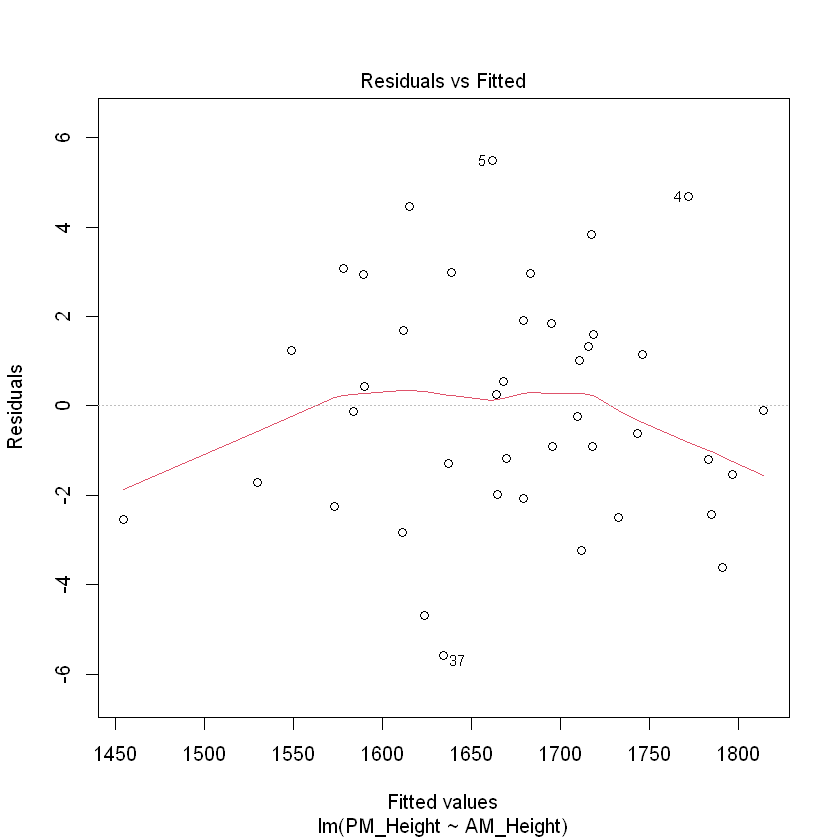

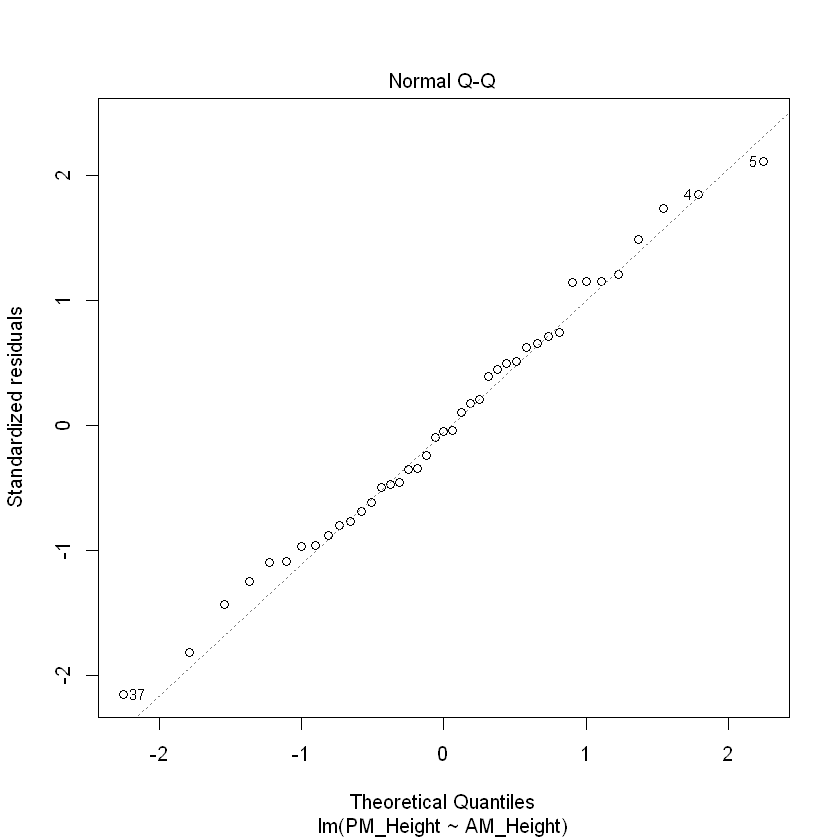

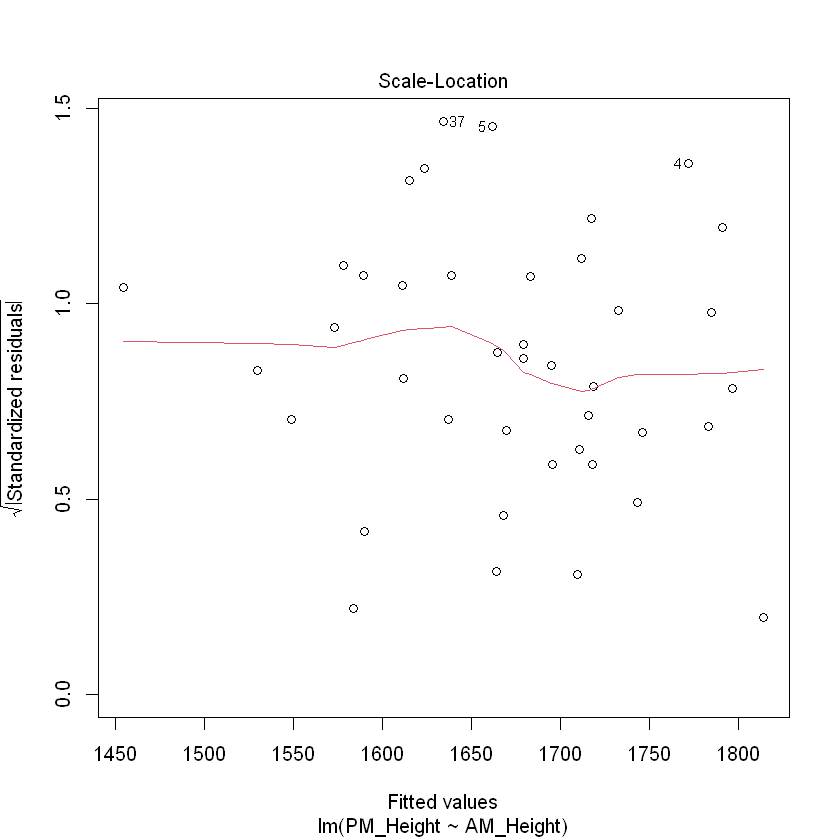

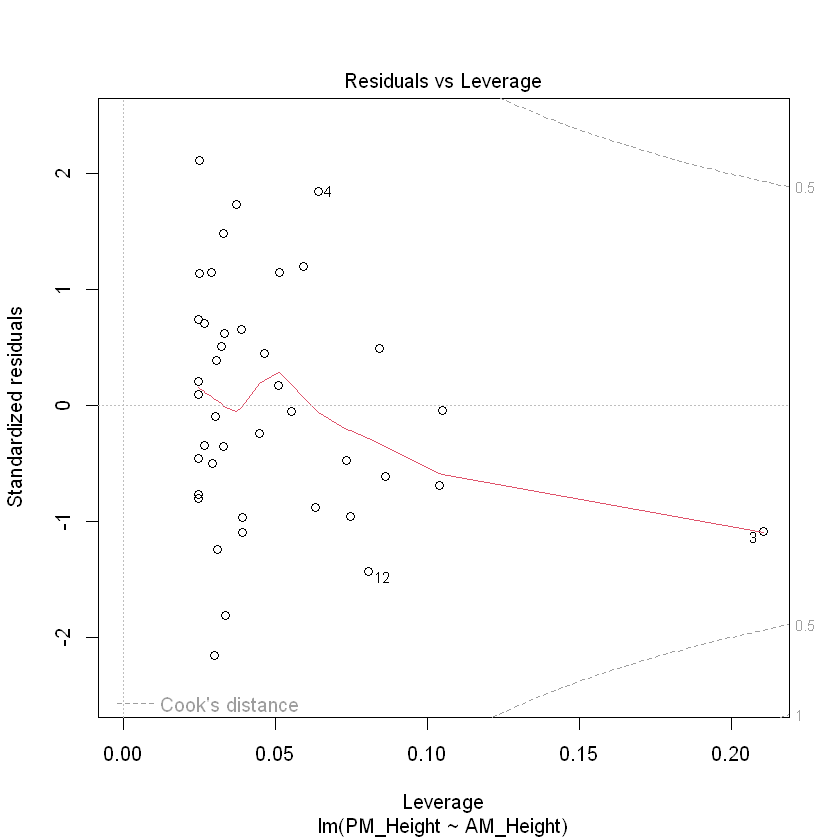

In [22]:
plot(lmModHeights)

#### The graphs are not flat so there is no assumption of homoscedasticity

### 2a) Breusch-Pagan Test

In [25]:
install.packages("lmtest")

Installing package into 'C:/Users/jacki/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

also installing the dependency 'zoo'




package 'zoo' successfully unpacked and MD5 sums checked
package 'lmtest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jacki\AppData\Local\Temp\RtmpIXVpbb\downloaded_packages


In [26]:
library("lmtest")

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




In [27]:
lmtest::bptest(lmModHeights)


	studentized Breusch-Pagan test

data:  lmModHeights
BP = 0.2079, df = 1, p-value = 0.6484


#### Test was not significant, so there is homoscedasticity

### 2b) Non-Constant Variance Test

In [28]:
car::ncvTest(lmModHeights)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.1519285, Df = 1, p = 0.6967

#### Test was not significant, so there is homoscedasticity

### 3) Homogeneity of Variance

#### Previous graphs show no assumption of homogeneity of variance can be made

### 3a) GVLMA test

In [29]:
gvlma(lmModHeights)


Call:
lm(formula = PM_Height ~ AM_Height, data = heights)

Coefficients:
(Intercept)    AM_Height  
     8.6537       0.9891  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = lmModHeights) 

                    Value p-value                Decision
Global Stat        2.6500  0.6180 Assumptions acceptable.
Skewness           0.0946  0.7584 Assumptions acceptable.
Kurtosis           0.4953  0.4816 Assumptions acceptable.
Link Function      1.8925  0.1689 Assumptions acceptable.
Heteroscedasticity 0.1676  0.6823 Assumptions acceptable.

#### All assumptions acceptable

### 4) Screening for Outliers (x-space)

### 4a) Cook's Distance

In [ ]:
library("nlme")

In [34]:
cooks.distance(lmModHeights, group=NULL, plot=TRUE, idn=3, newwd=TRUE)

1            2            3            4            5            6 
6.616271e-03 2.746798e-02 1.577662e-01 1.166068e-01 5.673442e-02 2.603652e-02 
           7            8            9           10           11           12 
1.256356e-04 2.457138e-02 3.704841e-03 8.761670e-03 8.936871e-05 8.956797e-02 
          13           14           15           16           17           18 
1.899822e-02 2.414154e-03 2.064951e-03 1.378748e-03 4.307834e-03 3.567746e-02 
          19           20           21           22           23           24 
4.897591e-03 7.406813e-03 8.092637e-03 6.918442e-03 8.591524e-03 2.605670e-03 
          25           26           27           28           29           30 
1.127033e-02 6.869754e-03 5.717631e-02 4.539726e-02 8.106778e-04 7.060946e-05 
          31           32           33           34           35           36 
1.384702e-04 1.772701e-02 5.801397e-02 1.645360e-03 1.667645e-02 3.713762e-02 
          37           38           39           40           41 
7.154305e-02 5.567940e-04 1.958563e-02 2.441454e-02 3.732683e-02

### 4b) Leverage Values

In [ ]:
lev = hat(model.matrix(lmModHeights))

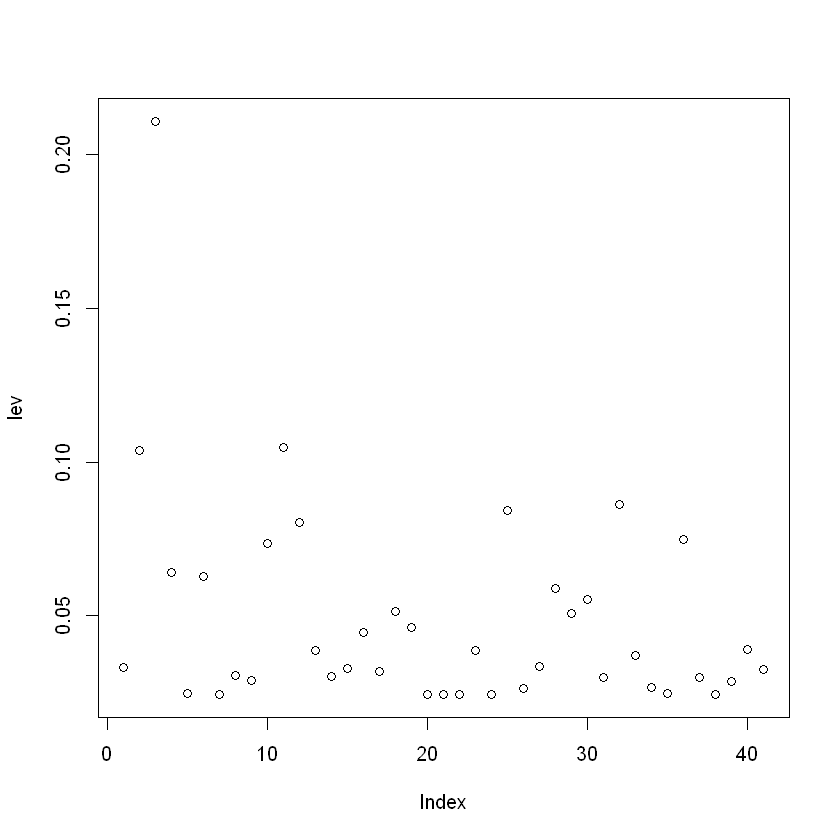

In [40]:
plot(lev)

#### The third point is an outlier

In [41]:
heights[lev>.2,]

AM_Height,PM_Height
<dbl>,<dbl>
1462.25,1452.5


### 4) Screening for Outliers (y-space)

In [42]:
car::outlierTest(lmModHeights)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
    rstudent unadjusted p-value Bonferroni p
37 -2.263445           0.029403           NA

### 4) Outliers (Influencial points)

In [43]:
summary(influence.measures(lmModHeights))

Potentially influential observations of
	 lm(formula = PM_Height ~ AM_Height, data = heights) :

   dfb.1_ dfb.AM_H dffit cov.r   cook.d hat    
3  -0.54   0.53    -0.56  1.26_*  0.16   0.21_*
11  0.01  -0.01    -0.01  1.18_*  0.00   0.10  
37 -0.19   0.17    -0.40  0.84_*  0.07   0.03  


#### 3, 11, and 37 should be removed from the data

In [44]:
heights_clean <- heights[c(1,2,5,6,7,8,9,10,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40,41),]

In [45]:
lmModHeights_clean = lm(PM_Height~AM_Height, data=heights_clean)

#### COMPARE SUMMARIES

In [46]:
summary(lmModHeights)


Call:
lm(formula = PM_Height ~ AM_Height, data = heights)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5694 -1.9884 -0.1255  1.6838  5.4790 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.653685   8.714042   0.993    0.327    
AM_Height   0.989149   0.005177 191.066   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.627 on 39 degrees of freedom
Multiple R-squared:  0.9989,	Adjusted R-squared:  0.9989 
F-statistic: 3.651e+04 on 1 and 39 DF,  p-value: < 2.2e-16


In [47]:
summary(lmModHeights_clean)


Call:
lm(formula = PM_Height ~ AM_Height, data = heights_clean)

Residuals:
   Min     1Q Median     3Q    Max 
-5.101 -1.743 -0.189  1.678  5.246 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.835236   9.896369   1.701    0.098 .  
AM_Height    0.984392   0.005892 167.079   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.374 on 34 degrees of freedom
Multiple R-squared:  0.9988,	Adjusted R-squared:  0.9987 
F-statistic: 2.792e+04 on 1 and 34 DF,  p-value: < 2.2e-16


#### No real difference in the models, so the outliers do not need to be removed